# House Prices: Advanced Regression Techniques
Competition Description


Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.


# Import Libraries


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stat
%matplotlib inline

# The data, train and test data 

The data has to be preprocessed both for training and test data to be able to use the ML algorithm when validating the model.



In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#there might be features that differ on test 
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
#lets drop id column
test.drop('Id',axis=1,inplace=True)
train.drop('Id',axis=1,inplace=True)



In [4]:
#looking at the info of the training data we can se the Dtypes are int64,float64 and object
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
test.info()#same as training data.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

In [6]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [9]:
train.shape

(1460, 80)

In [10]:
test.shape#only feature missing is the SalePrice

(1459, 79)

# Lets analyze the Features of the data, lets look at the nummeric data.

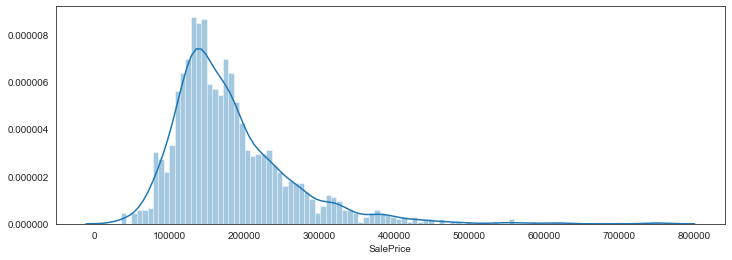

In [13]:
# Ignore warnings
import warnings
warnings.filterwarnings(action="ignore")
#first plot the distribution of price column, we can see if its skewed
sns.set_style('white')
fig, ax =plt.subplots(nrows=1,ncols=1,figsize=(12,4))
sns.distplot(train['SalePrice'],bins=100);

In [14]:
#The data is centered around 0 with some deviating sales data.
print('Skewness: {}'.format( train['SalePrice'].skew()))
print('Kurtosis: {}'.format( train['SalePrice'].kurt()))
#as can be seen some outliers are dispersing the destribution, later on they might be better of removed.


Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


In [5]:
#cathegorical columns train data
cathegorical_train=train.select_dtypes(exclude=['int64', 'float64']).columns

In [6]:
#cathegorical columns test data
cathegorical_test=test.select_dtypes(exclude=['int64', 'float64']).columns

In [7]:
#cathegorical train data
Train_cathegorical=train[list(cathegorical_train)]

In [8]:
#cathegorical test data
Test_cathegorical=train[list(cathegorical_test)]

In [9]:
#nummerical columns train data
nummerical_train=train.select_dtypes(exclude=['object']).columns

In [10]:
#nummerical columns test data
nummerical_test=test.select_dtypes(exclude=['object']).columns

In [11]:
#lets first analyze the nummerical training data
Train_nummerical=train[list(nummerical_train)]#dataFrame containing the nummerical data

In [12]:
#for the rest of the document im doing the same operations on test as train data
Test_nummerical=test[list(nummerical_test)]

In [13]:
#Any missing data in the nummeric portion?
Train_nummerical.isnull().sum() #seems we have some missing data on LotFrontage, GarageYrBlt Train_nummerical.isnull().sum() #seems we have some missing data on LotFrontage, GarageYrBlt, and 

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [14]:
#The same operations used on training data will be done on the test data, 
#else we would have data leakage, for exploratory parts we will focus on train data excluding this cell. 
Test_nummerical.isnull().sum()

MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [21]:
#lets look at nummeric data with correlation to the SalePrice
#correlating data
Corr_nummeric_train=Train_nummerical.corr()['SalePrice'][:-1]#droping salesprice since it will always have 1 to 1 correlation to itself.
#lets sort the correlating values
Corr_nummeric_train.sort_values(ascending=True,inplace=True)



In [16]:
#which features correlate best with SalePrice in the nummeric features lets look at top 8?
top8_corr=Corr_nummeric_train[-8::]
list(top8_corr.index)
top8_corr#top 8 nummeric features correlated to the SalePrice

TotRmsAbvGrd    0.533723
FullBath        0.560664
1stFlrSF        0.605852
TotalBsmtSF     0.613581
GarageArea      0.623431
GarageCars      0.640409
GrLivArea       0.708624
OverallQual     0.790982
Name: SalePrice, dtype: float64

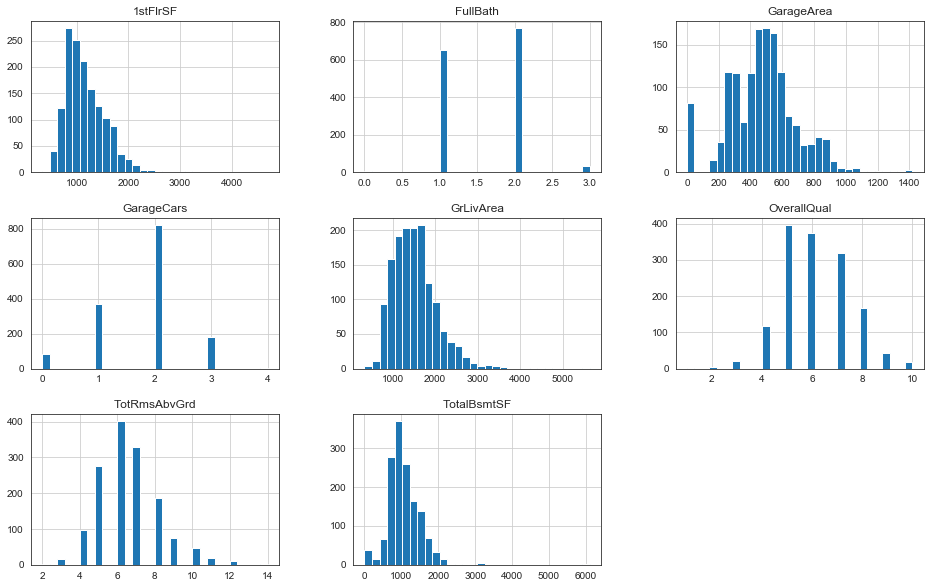

In [32]:
#lets make a hisplot of the most correlated features with sales price.
Train_nummerical[list(top8_corr.index)].hist(figsize=(16,10),bins=30);

# Lets look at some scatterplots/boxplots to get an idea of the correlations between this features and SalePrice

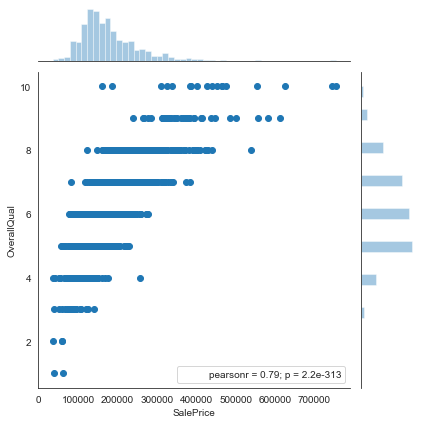

In [33]:
#SalePrice VS OverallQual
sns.jointplot(x='SalePrice',y='OverallQual',data=Train_nummerical,kind='scatter',stat_func=stat.pearsonr);
#makes sense the the quality of the home is going to be very correlated to the saleprice.    


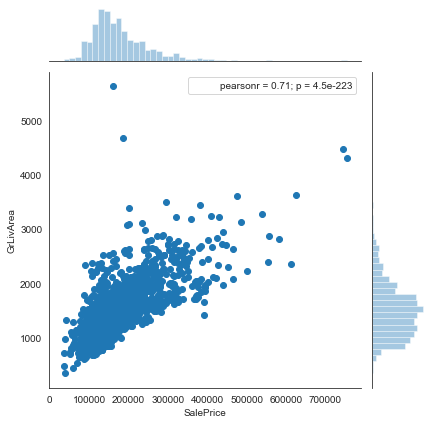

In [21]:
#SalePrice VS GrLivArea, GrLivArea shows the living area square feet above ground
#and is also highly related to the SalePrice. 
sns.jointplot(x='SalePrice',y='GrLivArea',data=Train_nummerical,kind='scatter',stat_func=stat.pearsonr);

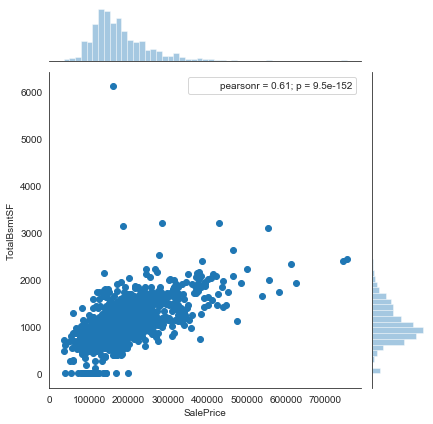

In [27]:
#SalePrice VS TotalBsmtSF, TotalBsmtSF shows total square feet of basement area, is  probably very related to living area
#therfor should have a good correlation to SalesPrice.
sns.jointplot(x='SalePrice',y='TotalBsmtSF',data=Train_nummerical,kind='scatter',stat_func=stat.pearsonr);

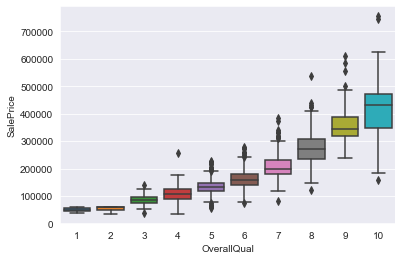

In [28]:
sns.set_style('darkgrid')
#make boxplots of same features
sns.boxplot(x='OverallQual',y='SalePrice',data=Train_nummerical);

# Feature Engineering Nummeric Data

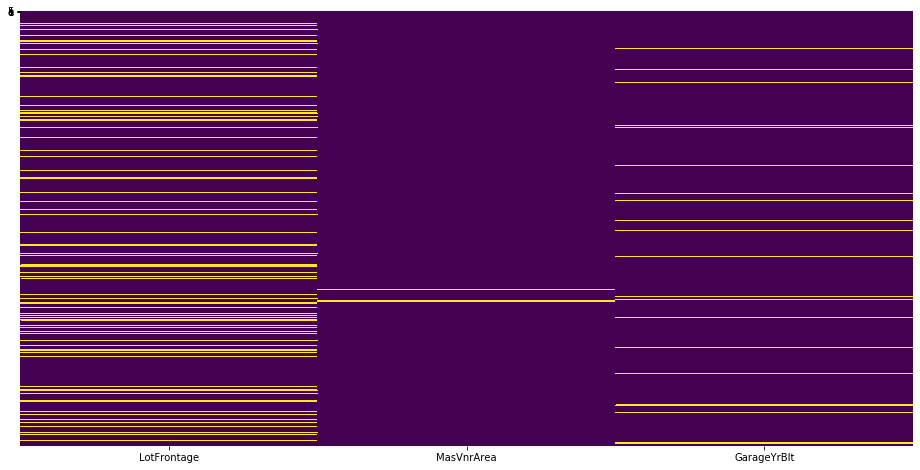

In [14]:
#lets look for missing with count, for nummeric data 
nulls=Train_nummerical.columns[Train_nummerical.isna().any()].tolist()
sub_set_null=Train_nummerical[nulls]
#sub_set_null.isnull()
#Lets look at the null columns with heatmap
plt.figure(figsize=(16,8))
sns.heatmap(sub_set_null.isnull(),cmap='viridis',cbar=False,yticklabels='False')
#three features in the nummeric data are missing data points LotFrontage,MassVnrArea
#GarageYrBlt
#Lets look at how this features correlate with SalePrice
train[['LotFrontage','MasVnrArea','GarageYrBlt','SalePrice']].corr()
#Lotfontage has alot of missing data and has correlation however 0.3 lets drop it first
train=train.drop(['LotFrontage'],axis=1)
test=test.drop(['LotFrontage'],axis=1)



In [23]:
#MasVnrArea has some missing data points but just a few,
#MasVnrArea is Masonry veneer area in square feet
train[train['MasVnrArea'].isnull()] # 8 are missing, we can go ahead and drop this 8 data points


,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,60,RL,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
529,20,RL,32668,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
650,60,FV,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
936,20,RL,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
973,20,FV,11639,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
977,120,FV,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1243,20,RL,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
1278,60,RL,9473,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000


In [15]:
#we assume Masonry veneer area in square feet is 0 where data is missing
train['MasVnrArea'].fillna(0,inplace=True)
test['MasVnrArea'].fillna(0,inplace=True)

In [16]:
#GarageyrBLT - We have missing values, lets assume this is due to missing garage
#we can replace nulls with earliest garage built since, lower values means higher age of garage.
train['GarageYrBlt'].fillna(train['GarageYrBlt'].min(),inplace=True)
test['GarageYrBlt'].fillna(test['GarageYrBlt'].min(),inplace=True)

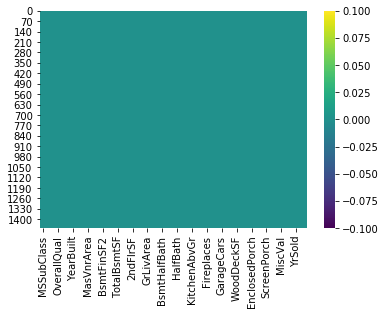

In [17]:
sns.heatmap(train.select_dtypes(exclude=['object']).isnull(),cmap='viridis')
#now we have all the nummeric data, lets focus on the cathegorical data.

# Feature Engineering Cathegorical Data

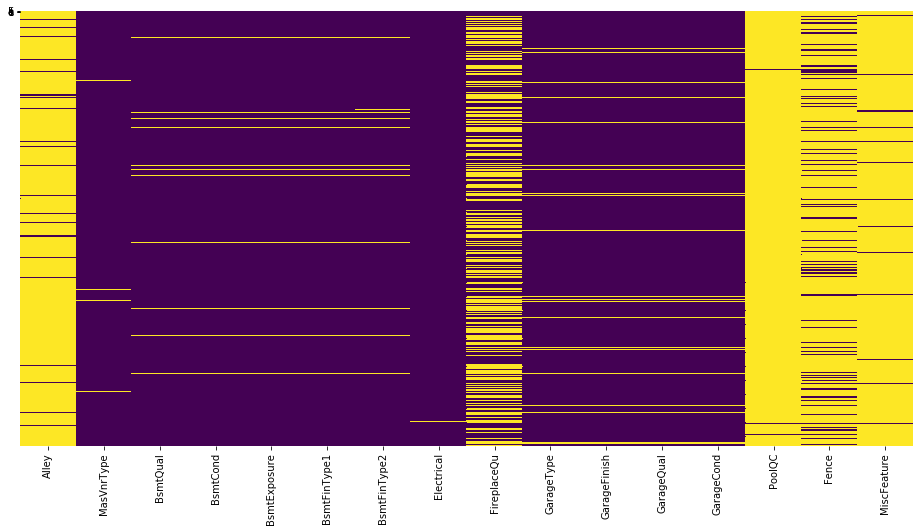

In [18]:
#Lets look at nulls for the cathegorical data like we did for the nummerical 
#data, using the same method
nulls_cat=Train_cathegorical.columns[Train_cathegorical.isna().any()].tolist()
sub_set_null_cat=Train_cathegorical[nulls_cat]
#sub_set_null.isnull()
#Lets look at the null columns with heatmap
plt.figure(figsize=(16,8))
sns.heatmap(sub_set_null_cat.isnull(),cmap='viridis',cbar=False,yticklabels='False') 
#Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical
#FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQc,Fence,MiscFeature
#We can se some features missing alot of data, also some features that
#are what i belive are dependent of eachother, for example if house dosent
#have a bsmt,garage the features that are related to this shouldent have quality or cond.
#lets start looking at each feature with nulls at a time.


In [19]:
#First feature is Alley, Type of alley access to property,NA 	No alley access
#we can assume that the house is simply missing an allay at the housing with null
train['Alley']=train['Alley'].fillna('NA')
test['Alley']=test['Alley'].fillna('NA')

In [20]:
#MasVnrType MasVnrType: Masonry veneer type, 
train['MasVnrType'].isnull().sum() #just 8 values are missing
#we can assume they dont have a Msonry veneer type, this is None
train[train['MasVnrType'].isnull()]['MasVnrArea'] #we can also the the MasVnrArea is 0 
train['MasVnrType'].fillna('None',inplace=True)
test['MasVnrType'].fillna('None',inplace=True)

In [21]:
#there are some na Values where not all bsmt features are null for the same houses, this are in 
#the BsmtExposure 
#feature Gd	Good Exposure
#Av	Average Exposure (split levels or foyers typically score average or above)	
#Mn	Mimimum Exposure
#No	No Exposure
#NA	No Basement
#We will fill this data with Average exposure, now we will do this null change where there is bsmt qual
#in order to make sure that this is only done on the data that has basements.
#train data find loc where they differ
index_Bsmtexp=train['BsmtExposure'].isnull()
index_Bsmtqual=train['BsmtQual'].isnull()
index_loc=index_Bsmtexp != index_Bsmtqual
idx_train=train[index_loc==True].index.tolist()

#for the test data same operation
indext_Bsmtexp=test['BsmtExposure'].isnull()
indext_Bsmtqual=test['BsmtQual'].isnull()
indext_loc=indext_Bsmtexp != indext_Bsmtqual
idx_test=test[indext_loc==True].index.tolist()

In [22]:
#filling the null in Bsmtexposure where there is a Basement.
train.loc[idx_train]['BsmtExposure'].fillna('No',inplace=True)
test.loc[idx_test]['BsmtExposure'].fillna('No',inplace=True)

In [23]:
#for BsmtQual and all the related features with bsmt we can see the features are missing for the same houses
#BsmtQual: Evaluates the height of the basement
# Ex	Excellent (100+ inches)	
# Gd	Good (90-99 inches)
# TA	Typical (80-89 inches)
# Fa	Fair (70-79 inches)
# Po	Poor (<70 inches
# NA	No Basement
#The houses missing BsmtQual inputs are assumend having no Basement. NA are used for the rest of the features.
train[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]=train[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].fillna('NA')
test[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]=test[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].fillna('NA')

In [26]:
train.isna().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
Alley            0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 79, dtype: int64

In [24]:
#Electrical only has one null value. lets just assume its standard circuit 
train['Electrical'].fillna('SBrkr',inplace=True)

In [25]:
#FireplaceQu: Fireplace quality

#Ex	Excellent - Exceptional Masonry Fireplace
#Gd	Good - Masonry Fireplace in main level
#TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
#Fa	Fair - Prefabricated Fireplace in basement
#Po	Poor - Ben Franklin Stove
#NA	No Fireplace
#

#filling the null in FireplaceQu.
train['FireplaceQu'].fillna('NA',inplace=True)
test['FireplaceQu'].fillna('NA',inplace=True)

In [26]:
#lets check if this fixed all the missing values for fireplaceQu
train['FireplaceQu'].isnull().sum()#0 no more missing data

0

In [27]:
#GarageType,GarageFinish,GarageQual,GarageCond are all missing data for the same houses, 
#they can all be filled with NA
train[['GarageType','GarageFinish','GarageQual','GarageCond']]=train[['GarageType','GarageFinish','GarageQual','GarageCond']].fillna('NA')
test[['GarageType','GarageFinish','GarageQual','GarageCond']]=test[['GarageType','GarageFinish','GarageQual','GarageCond']].fillna('NA')

In [28]:
#PoolQC PoolQC: Pool quality
# Ex	Excellent
# Gd	Good
# TA	Average/Typical
# Fa	Fair
# NA	No Pool



#filling the null values
train['PoolQC'].fillna('NA',inplace=True)
test['PoolQC'].fillna('NA',inplace=True)


In [32]:
#lets check if this fixed all the missing values for PoolQC
train['PoolQC'].isnull().sum()#0 no more missing data

0

In [29]:
#Fence Fence Quality lets just assume it has no fence its just one value. 
train['Fence'].fillna('NA',inplace=True)
test['Fence'].fillna('NA',inplace=True)

In [30]:
#MiscFeature, MiscFeature: Miscellaneous feature not covered in other categories

# Elev	Elevator
# Gar2	2nd Garage (if not described in garage section)
# Othr	Other
# Shed	Shed (over 100 SF)
# TenC	Tennis Court
# NA	None


#filling the null values
train['MiscFeature'].fillna('NA',inplace=True)
test['MiscFeature'].fillna('NA',inplace=True)

In [31]:
train['MiscFeature'].isnull().sum()#0 no more missing data

0

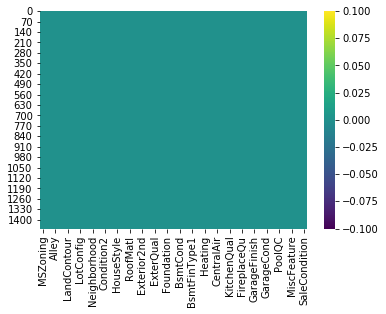

In [32]:
#Lets check if there is any missing cathegorical data
sns.heatmap(train.select_dtypes(exclude=['int64', 'float64']).isnull(),cmap='viridis')


In [33]:
train.isnull().sum()[train.isnull().sum()>0]
#test.shape

Series([], dtype: int64)

In [34]:
#filling nulls, just for submission to have the right amount of houses.
iteration=test.isnull().sum()[test.isnull().sum()>0].index.tolist()
for i in iteration:
    if test[i].dtype=='O':
        test[i].fillna('NA',inplace=True)
    else:
        test[i].fillna(0,inplace=True)
    

In [35]:
test.isnull().sum()[test.isnull().sum()>0]

Series([], dtype: int64)

In [36]:
train[train['SalePrice']>500000]#Due to the skewness lets drop this outlier values from training data, there
#simply isent enough data.

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
178,20,RL,17423,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,NA,NA,NA,0,7,2009,New,Partial,501837
440,20,RL,15431,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,...,0,NA,NA,NA,0,4,2009,WD,Normal,555000
691,60,RL,21535,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,...,0,NA,NA,NA,0,1,2007,WD,Normal,755000
769,60,RL,53504,Pave,NA,IR2,HLS,AllPub,CulDSac,Mod,...,0,NA,NA,NA,0,6,2010,WD,Normal,538000
803,60,RL,13891,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,...,0,NA,NA,NA,0,1,2009,New,Partial,582933
898,20,RL,12919,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,...,0,NA,NA,NA,0,3,2010,New,Partial,611657
1046,60,RL,16056,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,...,0,NA,NA,NA,0,7,2006,New,Partial,556581
1169,60,RL,35760,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,NA,NA,NA,0,7,2006,WD,Normal,625000
1182,60,RL,15623,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,...,555,Ex,MnPrv,NA,0,7,2007,WD,Abnorml,745000


In [37]:
idx_drop=train[train['SalePrice']>500000].index
train.drop(idx_drop,axis=0,inplace=True)

In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotArea        1459 non-null   int64  
 3   Street         1459 non-null   object 
 4   Alley          1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [39]:
#Lets concatenate the test and train for dummie_creation
df=pd.concat([train,test],ignore_index=True)


In [48]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2910 entries, 0 to 2909
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2910 non-null   int64  
 1   MSZoning       2906 non-null   object 
 2   LotArea        2910 non-null   int64  
 3   Street         2910 non-null   object 
 4   Alley          2910 non-null   object 
 5   LotShape       2910 non-null   object 
 6   LandContour    2910 non-null   object 
 7   Utilities      2908 non-null   object 
 8   LotConfig      2910 non-null   object 
 9   LandSlope      2910 non-null   object 
 10  Neighborhood   2910 non-null   object 
 11  Condition1     2910 non-null   object 
 12  Condition2     2910 non-null   object 
 13  BldgType       2910 non-null   object 
 14  HouseStyle     2910 non-null   object 
 15  OverallQual    2910 non-null   int64  
 16  OverallCond    2910 non-null   int64  
 17  YearBuilt      2910 non-null   int64  
 18  YearRemo

# Lets convert cathegorical data to nummerica data with dummie variables, which is going to be needed when training the ML algorithm.

In [40]:
y_testing=train['SalePrice']
#dummy variable, droping first to avoid collinearity
df=pd.get_dummies(df,drop_first=True)#we still have to drop the saleprice however this will be

In [41]:
df.shape

(2910, 266)

In [42]:

#the y value used to create the ML regression
train=df.loc[df['SalePrice'].notna()]
test=df.loc[df['SalePrice'].isna()]
#drop SalePrice from training data.
train.drop('SalePrice',axis=1,inplace=True)
test.drop('SalePrice',axis=1,inplace=True)


C:\Users\nightwolfer\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [43]:
test.shape


(1459, 265)

In [65]:
train.info(verbose=True)#only nummeric values perfect.
train.describe().transpose()# There is a big fluctuation between the values of each feature some are really big
#we will need to scale the data when training the model.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1450
Data columns (total 258 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   MSSubClass             int64  
 1   LotArea                int64  
 2   OverallQual            int64  
 3   OverallCond            int64  
 4   YearBuilt              int64  
 5   YearRemodAdd           int64  
 6   MasVnrArea             float64
 7   BsmtFinSF1             float64
 8   BsmtFinSF2             float64
 9   BsmtUnfSF              float64
 10  TotalBsmtSF            float64
 11  1stFlrSF               int64  
 12  2ndFlrSF               int64  
 13  LowQualFinSF           int64  
 14  GrLivArea              int64  
 15  BsmtFullBath           float64
 16  BsmtHalfBath           float64
 17  FullBath               int64  
 18  HalfBath               int64  
 19  BedroomAbvGr           int64  
 20  KitchenAbvGr           int64  
 21  TotRmsAbvGrd           int64  
 22  Fireplaces             

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1451.0,56.960717,42.397924,20.0,20.0,50.0,70.0,190.0
LotArea,1451.0,10442.747760,9916.673175,1300.0,7517.5,9452.0,11506.0,215245.0
OverallQual,1451.0,6.079256,1.362524,1.0,5.0,6.0,7.0,10.0
OverallCond,1451.0,5.578222,1.115370,1.0,5.0,5.0,6.0,9.0
YearBuilt,1451.0,1971.071675,30.189728,1872.0,1954.0,1972.0,2000.0,2010.0
...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,1451.0,0.002757,0.052450,0.0,0.0,0.0,0.0,1.0
SaleCondition_Alloca,1451.0,0.008270,0.090595,0.0,0.0,0.0,0.0,1.0
SaleCondition_Family,1451.0,0.013784,0.116632,0.0,0.0,0.0,0.0,1.0
SaleCondition_Normal,1451.0,0.822881,0.381901,0.0,1.0,1.0,1.0,1.0


#   We are going to look at the results of using  different models - SGD regressor, Lasso, SVR...


# Starting by making train_test_split, this test split is used throughout the model testing.

In [44]:
from sklearn.model_selection import train_test_split
#We need a test train split to evaluate the model 
X=train
y=y_testing
X_Evaluation=test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [45]:
LRMSE_model = [] # for storing the LRMSE 
Name_model=[]

# Starting with Stochastic Gradient Descent (SGD) regressor.

In [46]:
from sklearn.pipeline import make_pipeline 
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
#training model using pipline that way we get more operations at once.
Pipeline=make_pipeline(StandardScaler(), SGDClassifier())
est=Pipeline.fit(X_train,y_train)
prediction=est.predict(X_test)

# Model Evalutation SGD

In [47]:
est#only used standard inputs

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [48]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction)) #Mean absolute error
print('MSE:', metrics.mean_squared_error(y_test, prediction))#Mean squared error (punishes outliers)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('Logaritmic RMSE:', np.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(prediction))))#root

MAE: 33614.89220183486
MSE: 2447695650.3233943
RMSE: 49474.191760183356
Logaritmic RMSE: 0.27060453099127263


In [49]:
LRMSE_model.append(np.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(prediction)))) # for storing the LRMSE 
Name_model.append('SGD')

In [50]:
y.mean() #in easy terms the RMSE is approximate error if i would predict on random house price with 
#the regression model. 

178272.87250172294

In [51]:
#the mean price is 180900 while error about 53000
100*(50000/180000) #almost 28% of the price wrong, i would not be super excited.

27.77777777777778

# Model & Evaluation Lasso

In [52]:
#training model using pipline that way we get more operations at once.
from sklearn.linear_model import Lasso
Pipeline2=make_pipeline(StandardScaler(), Lasso(alpha=0.1))
est2=Pipeline2.fit(X_train,y_train)
prediction=est2.predict(X_test)

C:\Users\nightwolfer\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 145191829338.58322, tolerance: 510788788.05238324
  positive)


In [53]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction)) #Mean absolute error
print('MSE:', metrics.mean_squared_error(y_test, prediction))#Mean squared error (punishes outliers)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('Logaritmic RMSE:', np.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(prediction))))

MAE: 16104.33034725685
MSE: 592832412.3827642
RMSE: 24348.150081325773
Logaritmic RMSE: 0.14431781858280707


In [54]:
LRMSE_model.append(np.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(prediction)))) # for storing the LRMSE 
Name_model.append('Lasso')

In [55]:
#the mean price is 180900 while error about 24000.
100*(24000/180000) #almost 13.3% of the price wrong, its looking better now!.

13.333333333333334

# Model & Evaluation SVR

In [56]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
#lets make a Gridsearch to try to find optimal parameters
grid_param={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['linear','rbf']}
#training model using pipline that way we get more operations at once.
clf = make_pipeline(StandardScaler(),GridSearchCV(SVR(),grid_param,refit=True))
est3=clf.fit(X_train,y_train)
prediction=est3.predict(X_test)
#prediction_true=est3.predict(test)

In [57]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction)) #Mean absolute error
print('MSE:', metrics.mean_squared_error(y_test, prediction))#Mean squared error (punishes outliers)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('Logaritmic RMSE:', np.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(prediction))))

MAE: 16224.230125288674
MSE: 662441966.6042066
RMSE: 25737.947987440773
Logaritmic RMSE: 0.13579899220505104


In [58]:
LRMSE_model.append(np.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(prediction)))) # for storing the LRMSE 
Name_model.append('SVR')

In [59]:
#the mean price is 180900 while error about 25700.
100*(25700/180000) #about 14% of the price wrong, HOWEVER THE logaritmic RMSE seems better # takes
#into account outliers more.


14.277777777777779

# Model & Evaluation Elastic-Net

In [60]:
from sklearn.linear_model import ElasticNet

In [61]:
Pipeline_ela=make_pipeline(StandardScaler(), ElasticNet())
est4=Pipeline_ela.fit(X_train,y_train)
prediction=est4.predict(X_test)

In [62]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction)) #Mean absolute error
print('MSE:', metrics.mean_squared_error(y_test, prediction))#Mean squared error (punishes outliers)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('Logaritmic RMSE:', np.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(prediction))))

MAE: 17431.410666458014
MSE: 685701713.2023463
RMSE: 26185.906766853546
Logaritmic RMSE: 0.1426257559879812


In [63]:
LRMSE_model.append(np.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(prediction)))) # for storing the LRMSE 
Name_model.append('Elastic_Net')

# Model & Evaluation Ridge regression

In [64]:
from sklearn.linear_model import Ridge

In [65]:
Pipeline_ridge=make_pipeline(StandardScaler(), Ridge())
est5=Pipeline_ridge.fit(X_train,y_train)
prediction=est5.predict(X_test)

In [66]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction)) #Mean absolute error
print('MSE:', metrics.mean_squared_error(y_test, prediction))#Mean squared error (punishes outliers)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('Logaritmic RMSE:', np.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(prediction))))

MAE: 16057.925431837855
MSE: 589457780.4557685
RMSE: 24278.751624739038
Logaritmic RMSE: 0.14371146840318583


In [67]:
LRMSE_model.append(np.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(prediction)))) # for storing the LRMSE 
Name_model.append('Ridge')

# Model & Evaluation Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
Pipeline_RFC=make_pipeline(StandardScaler(), RandomForestClassifier())
est6=Pipeline_RFC.fit(X_train,y_train)
prediction=est6.predict(X_test)

In [96]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction)) #Mean absolute error
print('MSE:', metrics.mean_squared_error(y_test, prediction))#Mean squared error (punishes outliers)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('Logaritmic RMSE:', np.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(prediction))))

MAE: 26869.07339449541
MSE: 1755741854.1926606
RMSE: 41901.57340951126
Logaritmic RMSE: 0.2305844768768265


In [70]:
LRMSE_model.append(np.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(prediction)))) # for storing the LRMSE 
Name_model.append('RandomForestClassifier')

# Chossing the right estimator

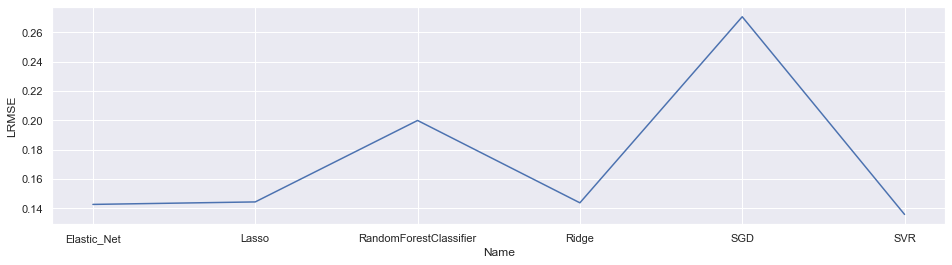

In [97]:
sns.set_style=('darkgrid')
lst=[]
for x,y in zip(Name_model,LRMSE_model):
    lst.append((x,y))
Estimators=pd.DataFrame(lst,columns=['Name','LRMSE'])
plt.figure(figsize=(16,4))
sns.set()
sns.lineplot(data=Estimators,x='Name',y='LRMSE');

In [80]:
Estimators

,LRMSE
SGD,0.270605
Lasso,0.144318
SVR,0.135799
Elastic_Net,0.142626
Ridge,0.143711
RandomForestClassifier,0.199872


In [123]:
submission_file=pd.read_csv('sample_submission.csv')
submission_file.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


# We use the SVR estimator due to lowest LRMSE

In [98]:
prediction_true=est3.predict(test)#SVR model

In [101]:
submission_file=pd.read_csv('sample_submission.csv')

In [102]:
submission_file=submission_file.drop('SalePrice',axis=1)
submission_file['SalePrice']=prediction_true

In [103]:
submission_file.index=submission_file['Id']

In [104]:
submission_file.drop('Id',axis=1,inplace=True)

In [105]:
submission_file.head()

,SalePrice
Id,
1461,114551.404458
1462,170400.510258
1463,186949.557381
1464,207239.660342
1465,198628.663548


In [106]:
submission_file.to_csv('test_pred_real.csv')